In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb

In [3]:
# import data
csv_data = pd.read_csv('./Road Accident Data.csv', low_memory=False)
csv_data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
# clean data
# csv_data['Accident_Severity'].replace(['Slight', 'Serious', 'Fatal', 'Fetal'], [0, 1, 2, 2], inplace=True)
# csv_data['Day_of_Week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
# csv_data['Light_Conditions'].replace(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Darkness - lights unlit'], [1, 2, 3, 4, 5], inplace=True)
# csv_data['Road_Surface_Conditions'].replace(['Dry', 'Wet or damp', 'Frost or ice', 'Snow', 'Flood over 3cm. deep'], [1, 2, 3, 4, 5], inplace=True)
# csv_data['Weather_Conditions'].replace(['Fine no high winds', 'Raining no high winds', 'Other', 'Snowing no high winds', 'Raining + high winds', 'Fine + high winds', 'Fog or mist', 'Snowing + high winds'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
# csv_data['Vehicle_Type'].replace(['Car', 'Van / Goods 3.5 tonnes mgw or under', 'Motorcycle over 500cc', 'Bus or coach (17 or more pass seats)', 'Motorcycle 125cc and under', 'Goods 7.5 tonnes mgw and over', 'Taxi/Private hire car', 'Motorcycle 50cc and under', 'Motorcycle over 125cc and up to 500cc', 'Other vehicle', 'Goods over 3.5t. and under 7.5t', 'Minibus (8 - 16 passenger seats)', 'Agricultural vehicle', 'Pedal cycle', 'Ridden horse'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace=True)
# csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'], inplace=True)
csv_data.loc[csv_data['Accident_Severity'] == 'Fetal', 'Accident_Severity'] = 'Fatal'


print(csv_data['Weather_Conditions'].value_counts(), "\n")
print(csv_data['Vehicle_Type'].value_counts(), "\n")

working_data = pd.DataFrame(csv_data[[
    'Day_of_Week',
    'Light_Conditions', 
    'Accident_Severity',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]])

working_data.head()

Weather_Conditions
Fine no high winds       244496
Raining no high winds     34877
Other                      8802
Snowing no high winds      4839
Raining + high winds       3526
Fine + high winds          3148
Fog or mist                1690
Snowing + high winds        538
Name: count, dtype: int64 

Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse

,Day_of_Week,Light_Conditions,Accident_Severity,Road_Surface_Conditions,Speed_limit,Weather_Conditions,Vehicle_Type
0,Thursday,Daylight,Serious,Dry,30,Fine no high winds,Car
1,Monday,Daylight,Serious,Wet or damp,30,Fine no high winds,Taxi/Private hire car
2,Sunday,Daylight,Slight,Dry,30,Fine no high winds,Taxi/Private hire car
3,Monday,Daylight,Serious,Frost or ice,30,Other,Motorcycle over 500cc
4,Tuesday,Darkness - lights lit,Serious,Dry,30,Fine no high winds,Car


# Random forest

In [5]:
# Assuming 'working_data' is your DataFrame with the required columns
data = working_data.copy()  # Make a copy of the original DataFrame

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for col in ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
print("==========Train data==========")
y_train_pred = rf_classifier.predict(X_train)

# Evaluate model performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix:")
print(train_conf_matrix)


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

==========Train data==========
Train Accuracy: 0.86
Train Classification Report:
              precision    recall  f1-score   support

       Fatal       0.94      0.03      0.05      3122
     Serious       0.82      0.03      0.05     32639
      Slight       0.86      1.00      0.92    210617

    accuracy                           0.86    246378
   macro avg       0.87      0.35      0.34    246378
weighted avg       0.85      0.86      0.80    246378

Train Confusion Matrix:
[[    87     14   3021]
 [     3    875  31761]
 [     3    177 210437]]

==========Test data==========
Accuracy: 0.85
              precision    recall  f1-score   support

       Fatal       0.05      0.00      0.00       831
     Serious       0.16      0.00      0.01      8101
      Slight       0.86      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.35      0.33      0.31     61595
weighted avg       0.75      0.85      0.79     61595

Confusion Matr

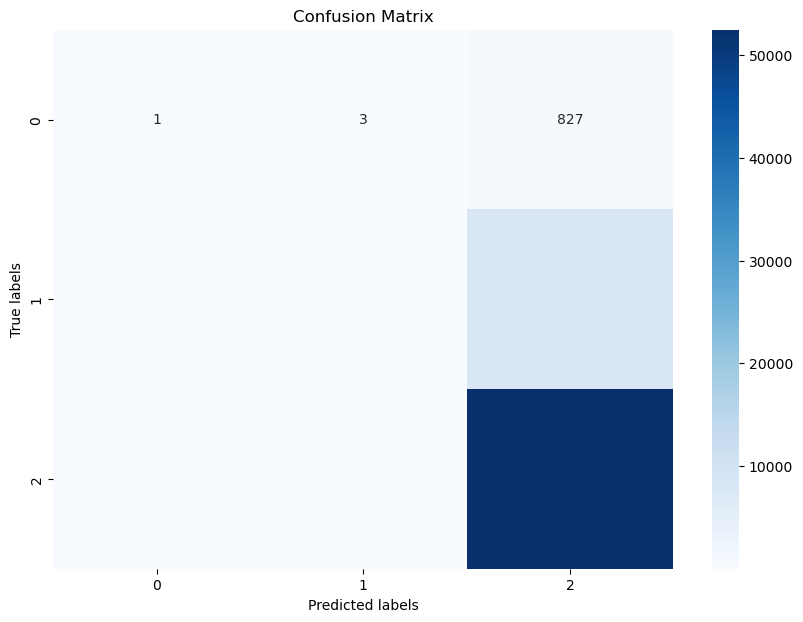

In [13]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Implement Neural Networks

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import setuptools._distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.keras.backend.clear_session()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
encoded_data = working_data.copy()

# List of categorical columns to encode
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Accident_Severity', 
                        'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']

# Initialize LabelEncoder for each categorical column
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_data)


In [ ]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type', 'Accident_Severity']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Convert DataFrame to float dtype (after encoding all categorical variables)
data = data.astype(float)

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure target variable y is numeric
y_train = y_train.astype(int)  # Ensure y_train is of integer dtype
y_test = y_test.astype(int)    # Ensure y_test is of integer dtype

# Initialize Neural Network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 output classes (Fatal, Serious, Slight)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled)  # Get the raw probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Determine the class with the highest probability

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0 to handle division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
print("==========Train data==========")
# Make predictions on training data
y_train_pred_prob = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
df = pd.DataFrame(data)

df = pd.DataFrame(data)

# Filter the DataFrame to select rows where Accident_Severity is 1.0
filtered_df = df[df['Accident_Severity'] == 2.0]

# Sample 3000 rows randomly from the filtered DataFrame
random_sample_df = filtered_df.sample(n=30, random_state=42)

print("Random Sample where Accident_Severity is 1.0:")
# print(random_sample_df)


for col in data:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    print(f"No. of val: {data[col].value_counts()}")
    print()

